# Schrodinger equation(1D space)
## Time dependent:
Time evolution equation of wave function $\Psi(x, t)$
$$\boxed{i\hbar \frac{\partial \Psi}{\partial t} = \frac{-\hbar^2}{2m}\frac{\partial^2 \Psi}{\partial x^2}+V\Psi}$$
Using the method, *separation of variable*(using $\Psi(x, t) = \psi(x)\phi(t)$) we get the time independent Schrodinger equation(namely Eigen value equation),
$$\hat H \psi = E\psi$$
## Time independent Schrodinger equation:
$$\boxed{\frac{-\hbar^2}{2m}\frac{d^2 \psi_n}{d x^2}+V\psi_n = E_n\psi_n}$$
* Note: The small $\psi = \psi(x)$ is called Eigen states.
The **Wobble factor** is $\phi(t) = e^{-iE_nt/\hbar}$

So $$\boxed{\Psi(x, t) = \psi(x)e^{-iE_nt/\hbar}}$$



# 1. Particle in a box
Potential form:
$$V(x) = \begin{cases} 0 & \text{if $|x|<a$}\\
\infty & \text{else} \end{cases}$$
Time independent Schrodinger equation for the case of $|x| < a
$:
$$\frac{d^2\psi}{dx^2} = -\frac{2mE}{\hbar^2}\psi$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
h = 1; m = 1
a = 1
V = 0

N = 2000
x, dx = np.linspace(-a, a, N, retstep = True)
psi = np.zeros(N); psi[0] = 0
DpsiDt = np.zeros(N); DpsiDt[0] = 1 #It's kind of random

# Next task: Find the all eigen energies.
E = 0; En = []
psi[-1] = 1 #Assigning this value grater than  0.001.
print("Eigen energies are: ")
while E <= 20: #Eigeplt.usen energies upto 150.
    E += .001

    for i in range(N-1):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] + dx*(-2*m*E/h**2)*psi[i]

    #Finding the eigen values
    if abs(psi[-1]) <= 0.001:
        En.append(E)
        print(E)
        E += 1 # this is another random, as we know two eigen
               #energies  do not differ from 1.
    


Eigen energies are: 
1.232999999999975
4.93000000000009
11.092999999999067
19.72100000000145


In [4]:
def integrate(y, x): # y is an array
    h = x[1] - x[0]
    return 0.5*h*(y[0]+y[-1]+2*sum(y[1:-1]))

0.9999999999999988
1.0000000000000002
1.0000000000000002
0.9999999999999996


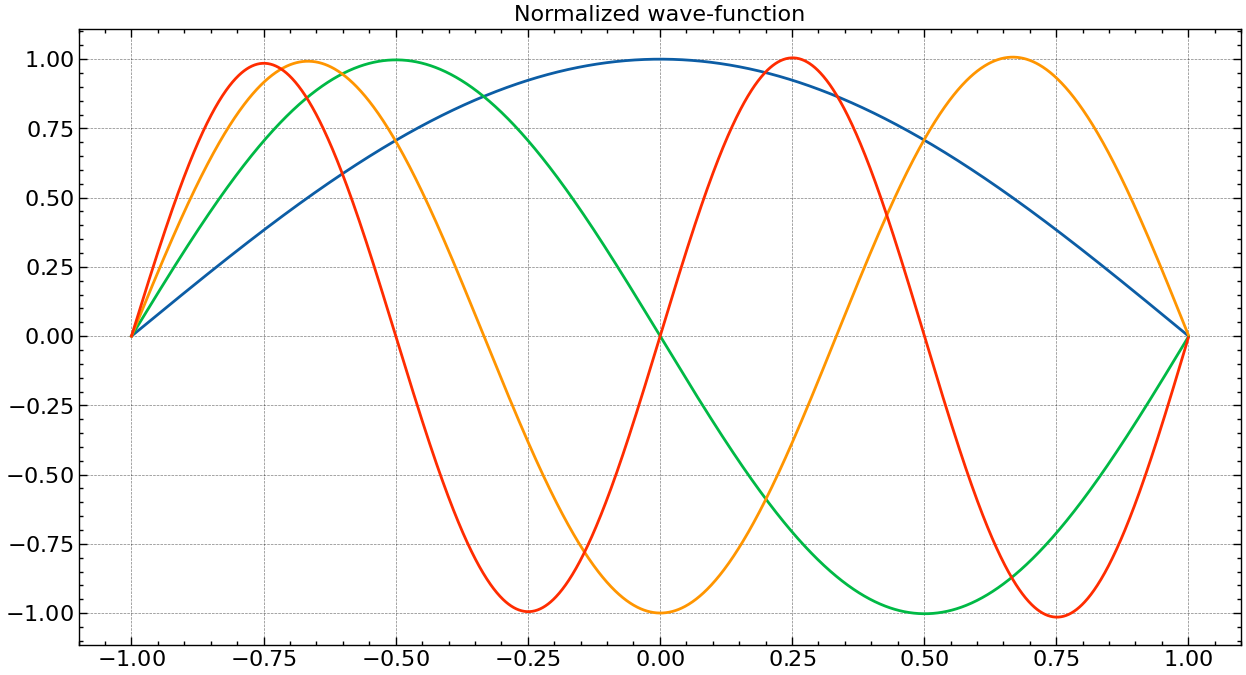

In [5]:
plt.figure(figsize = (15, 8))
for E in En:
    for i in range(N-1):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] + dx*(-2*m*E/h**2)*psi[i]
    Norm = np.sqrt(1/integrate(psi*psi, x))
    psiN = Norm*(psi)
    print(integrate(psiN*psiN, x))
    plt.plot(x, psiN)
plt.title("Normalized wave-function")
plt.show()

# 2. Step potential
The potential is in the form of $$V(x) = \begin{cases} 0 & \text{if $x < 0$}\\V_0 & \text{if $x>0$}\end{cases}$$

# 2. Harmonic Oscillator
Potential form of 1D linear harmonic oscillator
$$V(x)=\frac{1}{2}m\omega^2 x$$
Time independent Schrodinger equation becomes
$$\frac{d^2\psi}{dx^2}= -\frac{2m}{\hbar^2}(E+ \frac{1}{2}m\omega^2 x)\psi $$

In [6]:
h = 1; m = 1

a = 1; # As the error of Euler method is (increment)^2
w = 1  # angular frequency of the oscillator


N = 2000
x, dx = np.linspace(-a, a, N, retstep = True)
psi = np.zeros(N); psi[0] = 0
DpsiDt = np.zeros(N); DpsiDt[0] = 1 #It's kind of random

# Next task: Find the all eigen energies.
E = 0; En = []
psi[-1] = 1 #A random slope as we know Eigen value DE have nothing to with slope it is the eigen value who leads everything
# print("Eigen energies are: ")
while E <= 15: #Eigeplt.usen energies upto 150.
    E += .001

    for i in range(N-1):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] - dx*(2*m/h**2)*(E + 0.5*m*w**2*x[i])*psi[i]

    #Finding the eigen values
    if abs(psi[-1]) <= 0.001:
        En.append(E)
        print(E)
        E += 1/3 # Analytically I found E_n = (n + 1/2)hw
    


1.223999999999976
4.933333333333352
11.094666666665884
